In [1]:
from IPython.core.display import HTML
display(HTML('<style>.container { width:95% !important; } </style>'))

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ito_diffusions import *
from statsmodels.graphics.tsaplots import plot_acf
plt.style.use('dark_background')

In [3]:
params = {
    'font.size': 14,
    'figure.figsize': (22, 18),
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
}
plt.rcParams.update(params)

In [4]:
SEED = 12345
T = int(1e3)
integrated = True

## Autoregressive model AR(p)

$$X_t = \mu + \sum_{i=1}^p a_{i} X_{t-i} + Z_t\,.$$

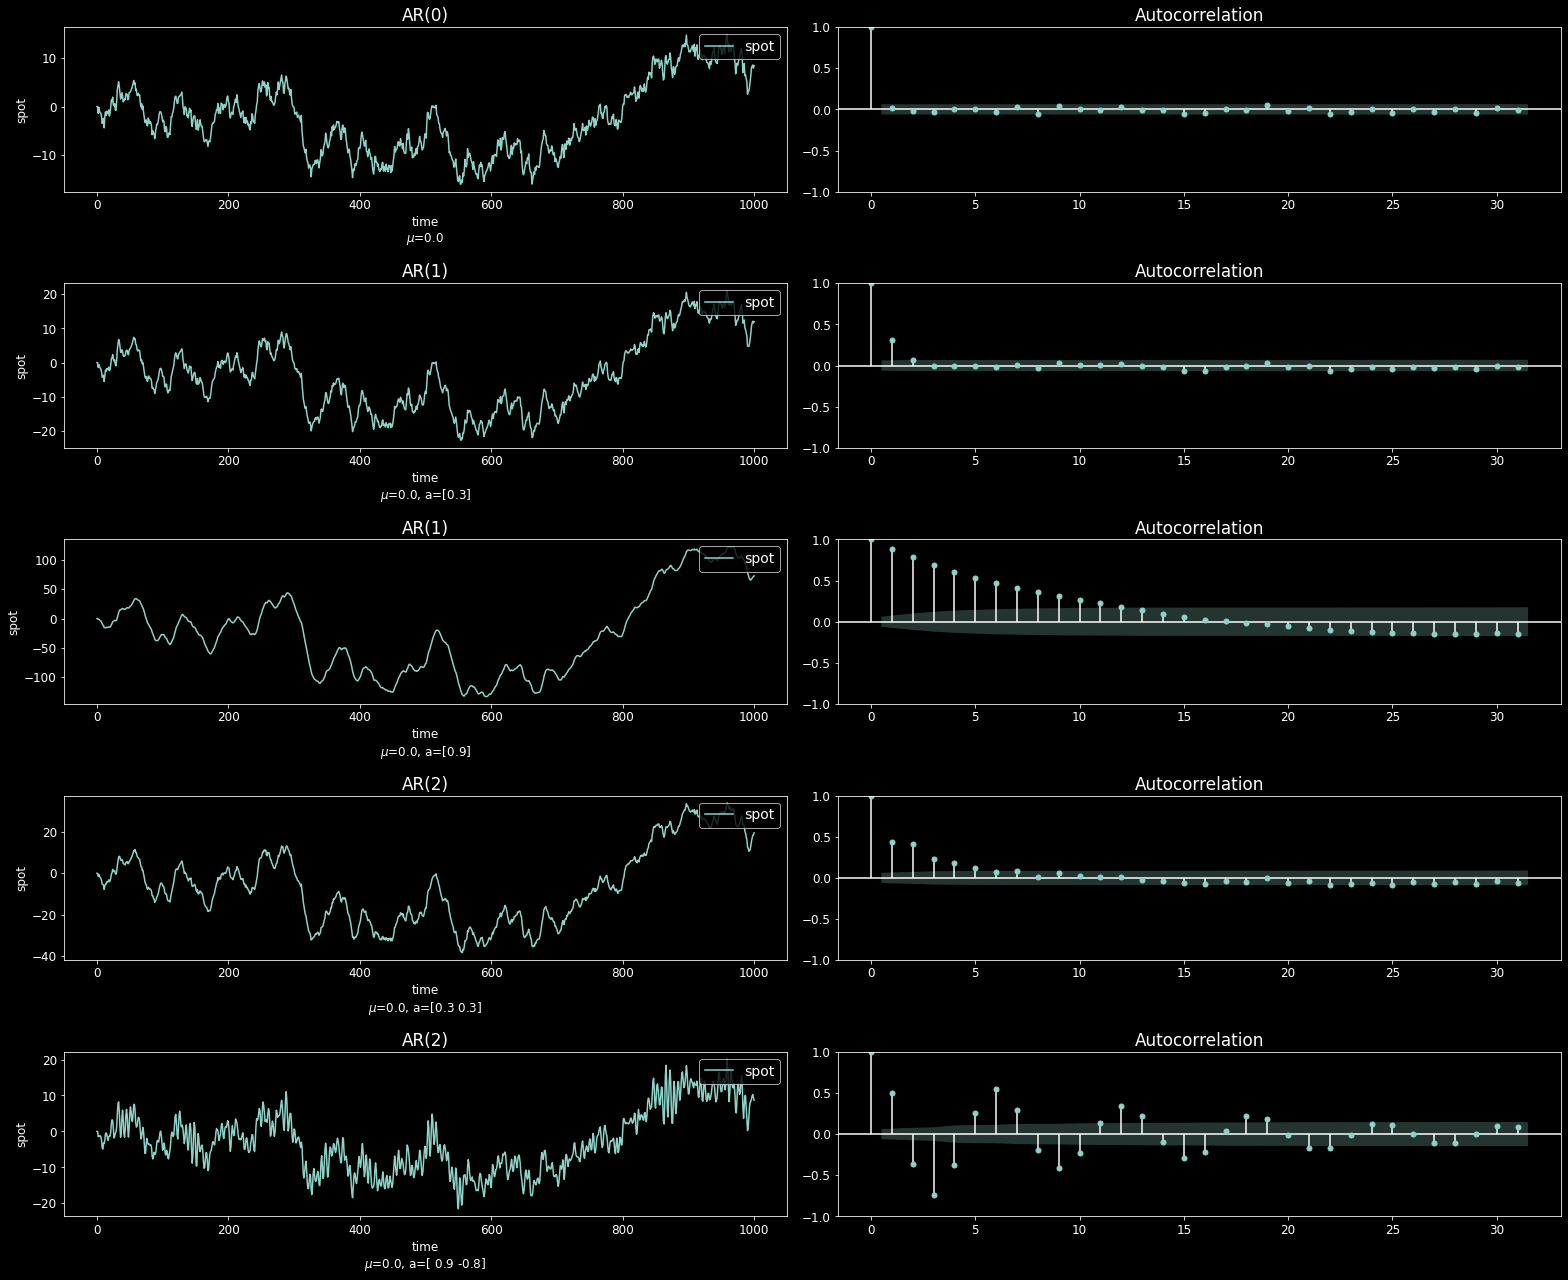

In [5]:
fig, axess = plt.subplots(nrows=5, ncols=2)

a_ = [
    [],
    [0.3],
    [0.9],
    [0.3, 0.3],
    [0.9, -0.8],
]

X = AR(x0=[0.0, 0.0], mu=0.0, T=T, vol=1.0)

for i, axes in enumerate(axess):
    a = a_[i]
    X.a = a
    # Rerun with same rng to see the difference between models using the same noise distribution
    X.rng = np.random.default_rng(SEED)
    df = X.simulate()
    
    ax = axes[0]
    if integrated:
        df.cumsum().plot(kind='line', ax=ax)
    else:
        df.plot(kind='line', ax=ax)

    if X.p > 0:
        ax.set_xlabel('time\n$\mu$={:.1f}, a={}'.format(X.mu, X.a))
    else:
        ax.set_xlabel('time\n$\mu$={:.1f}'.format(X.mu))
    ax.set_ylabel('spot')
    ax.legend(loc='upper right')
    ax.set_title('AR({:.0f})'.format(X.p))
    
    ax = axes[1]
    plot_acf(df, ax=ax)
    
plt.tight_layout()
plt.show()

## Moving-average model MA(q)

$$X_t = \mu + Z_t + \sum_{j=1}^q b_{j} Z_{t-j}\,.$$

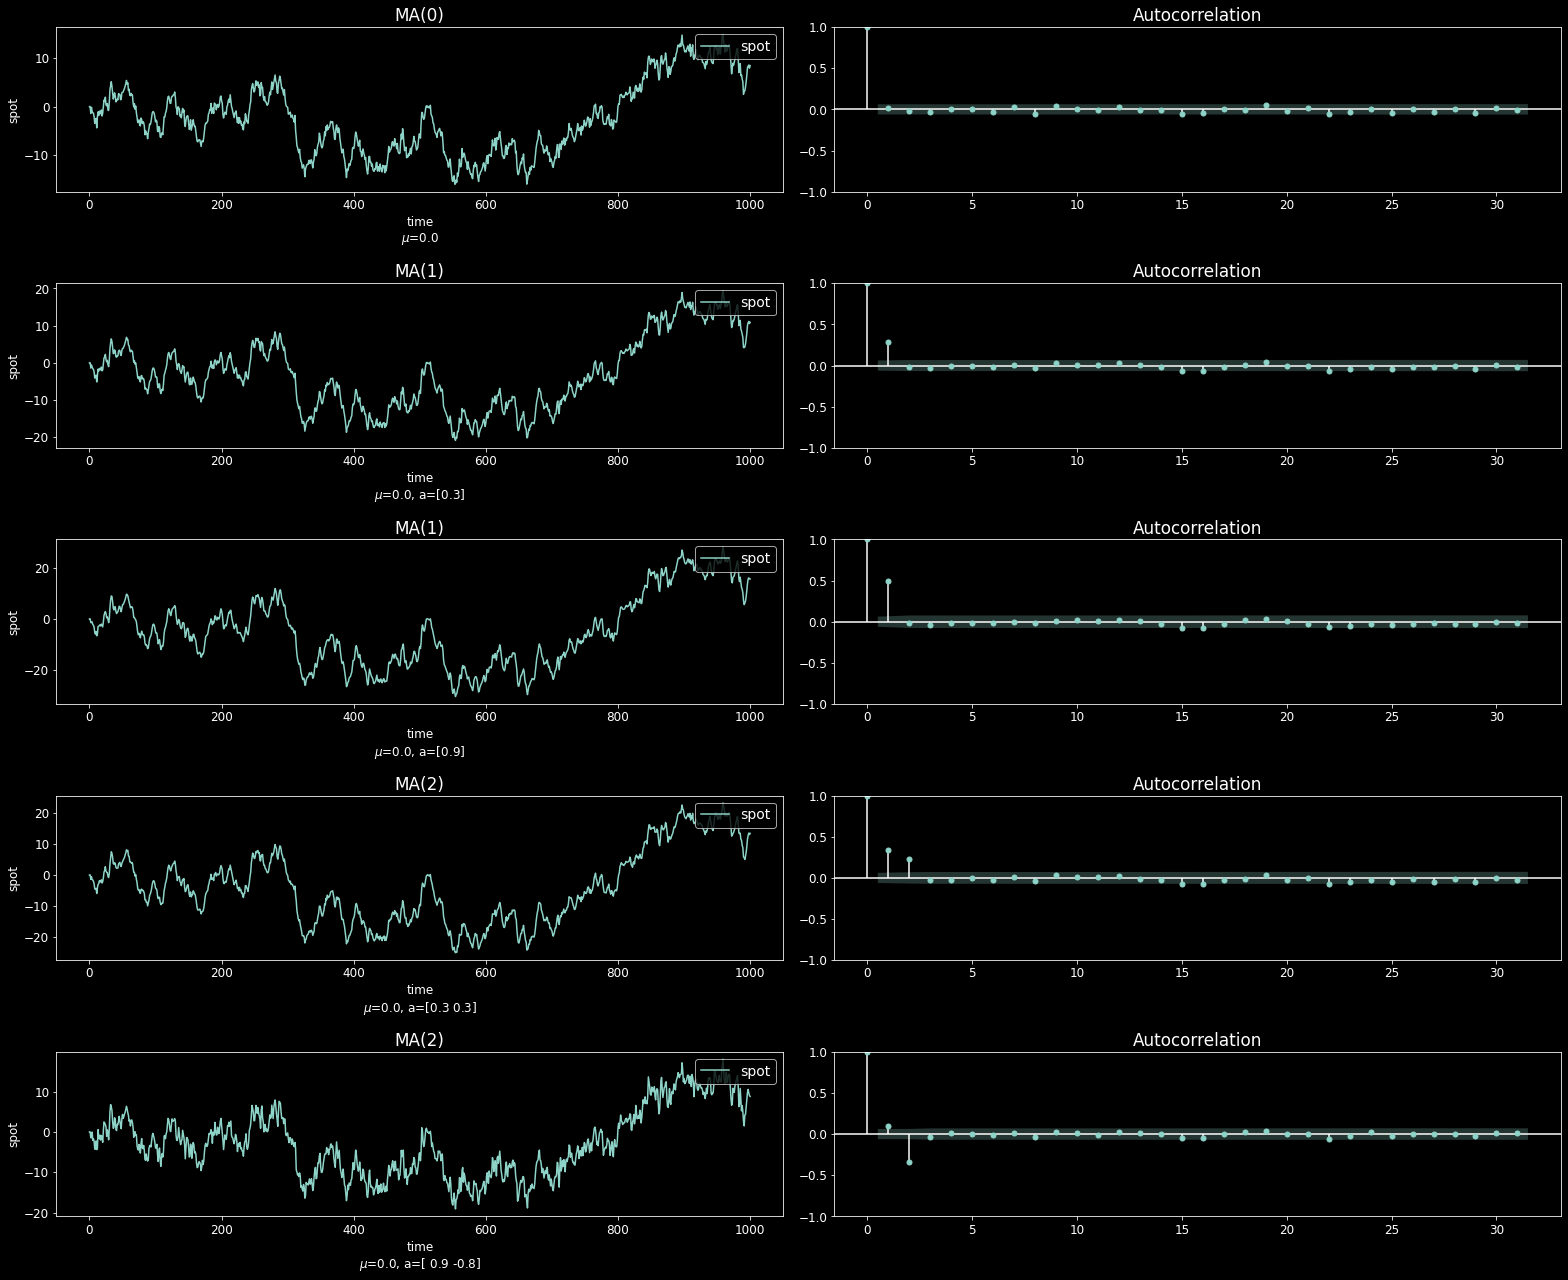

In [6]:
fig, axess = plt.subplots(nrows=5, ncols=2)

b_ = [
    [],
    [0.3],
    [0.9],
    [0.3, 0.3],
    [0.9, -0.8],
]

X = MA(x0=[0.0, 0.0], mu=0.0, T=T, vol=1.0)

for i, axes in enumerate(axess):
    b = b_[i]
    X.b = b
    X.rng = np.random.default_rng(SEED)
    df = X.simulate()
    
    ax = axes[0]
    if integrated:
        df.cumsum().plot(kind='line', ax=ax)
    else:
        df.plot(kind='line', ax=ax)

    if X.q > 0:
        ax.set_xlabel('time\n$\mu$={:.1f}, a={}'.format(X.mu, X.b))
    else:
        ax.set_xlabel('time\n$\mu$={:.1f}'.format(X.mu))
    ax.set_ylabel('spot')
    ax.legend(loc='upper right')
    ax.set_title('MA({:.0f})'.format(X.q))
    
    ax = axes[1]
    plot_acf(df, ax=ax)
    
plt.tight_layout()
plt.show()

## Autoregressive Moving-average model ARMA(p, q)

$$X_t = \mu + Z_t + \sum_{i=1}^p a_{i} X_{t-i} + \sum_{j=1}^q b_{j} Z_{t-j}\,.$$

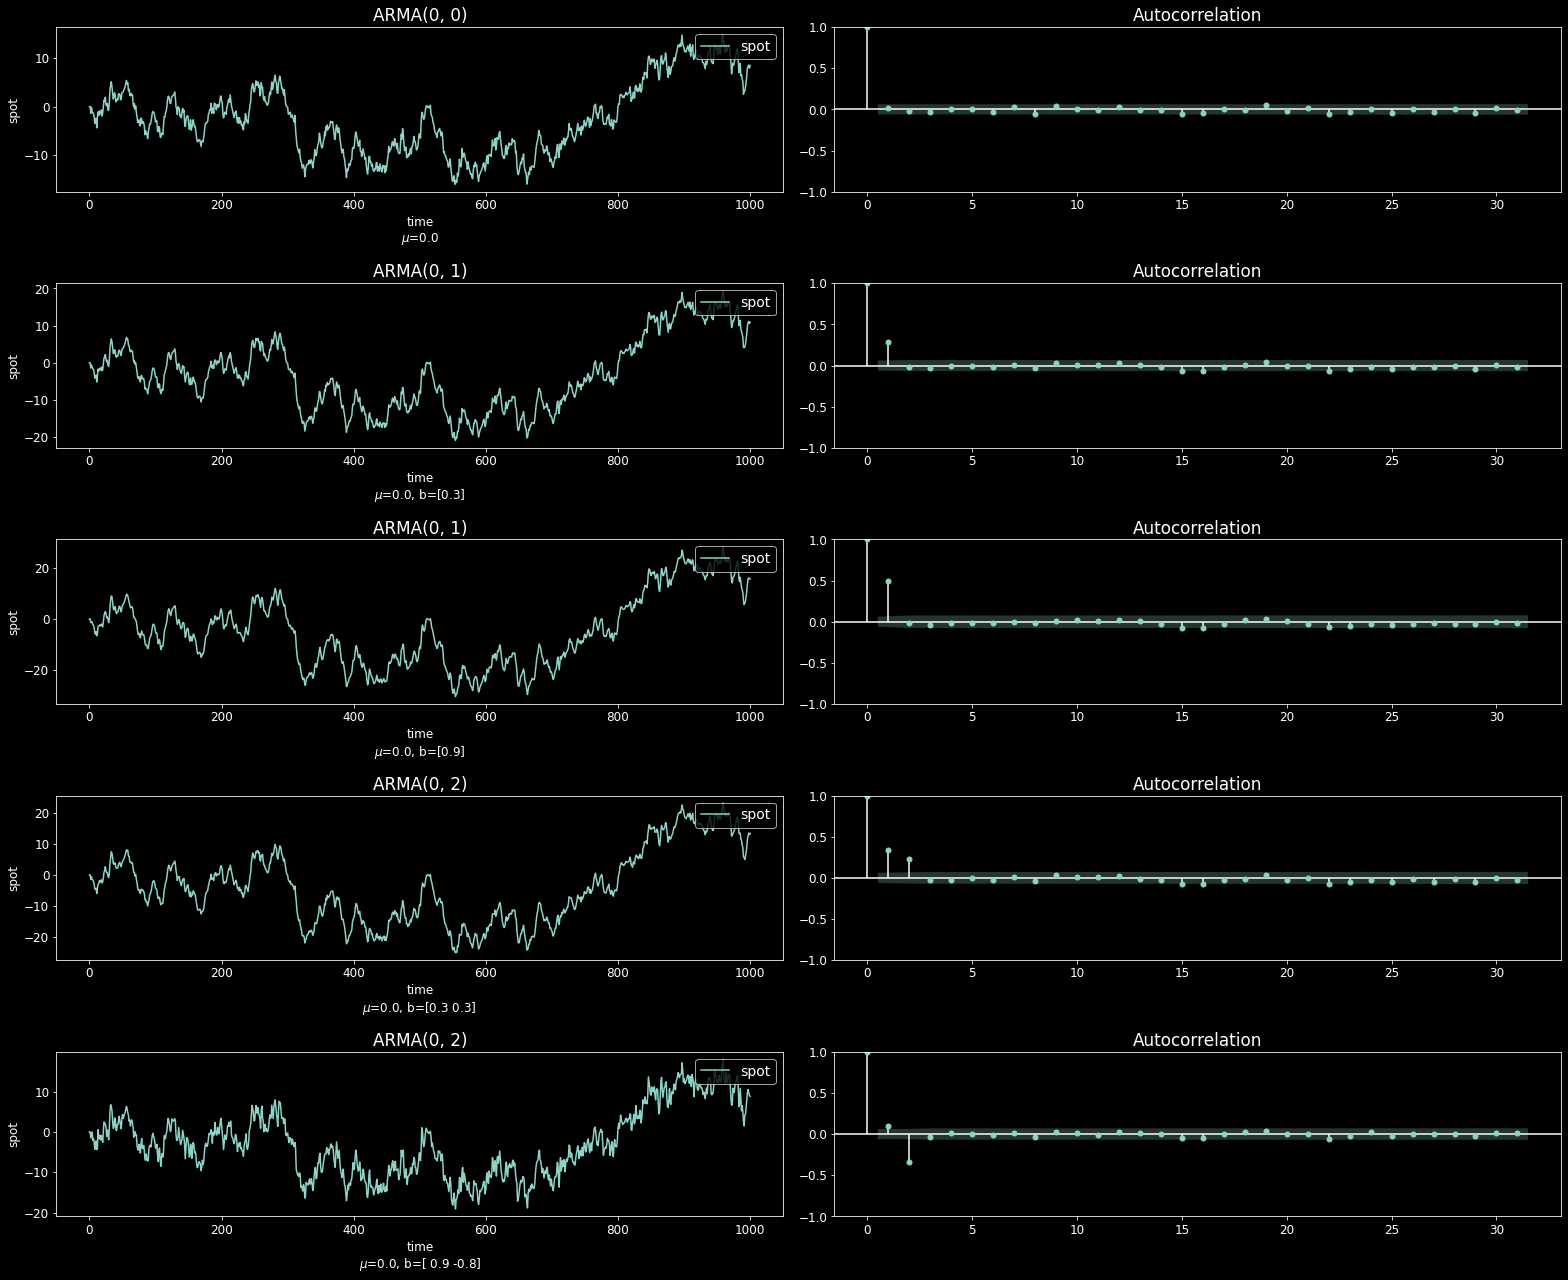

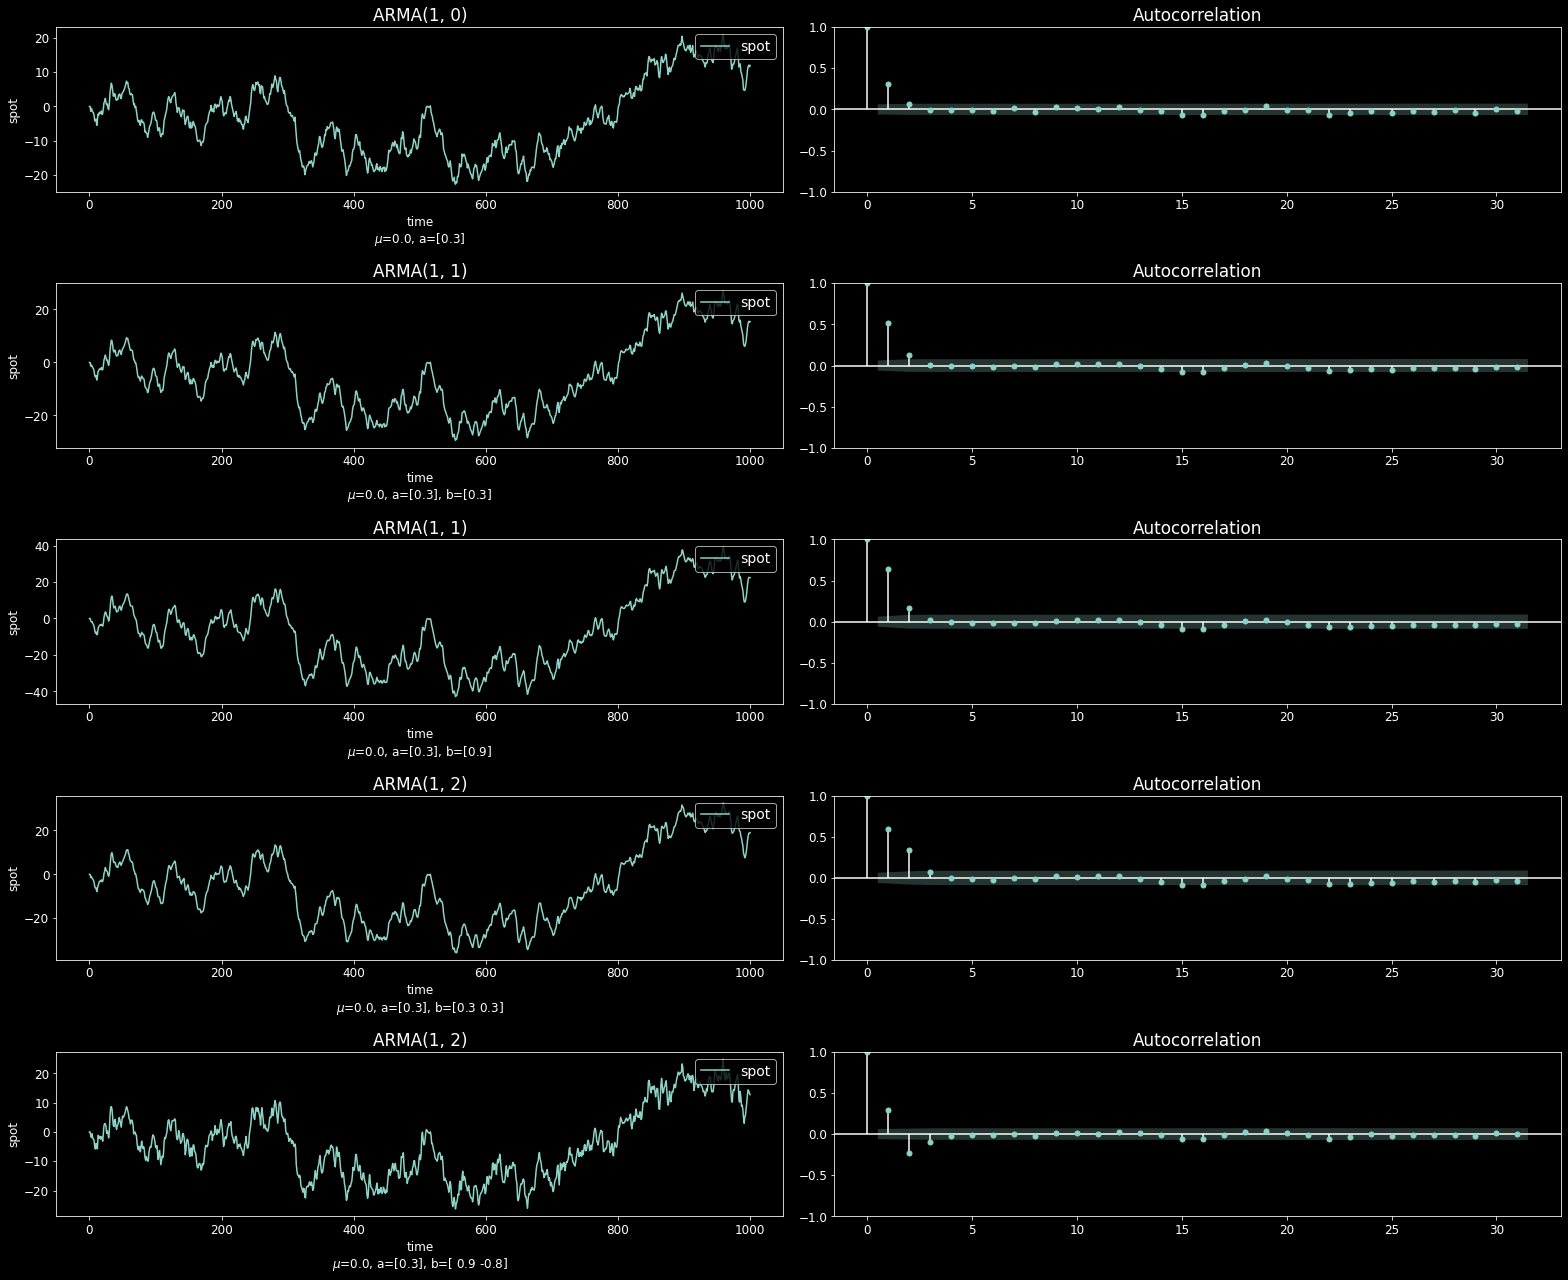

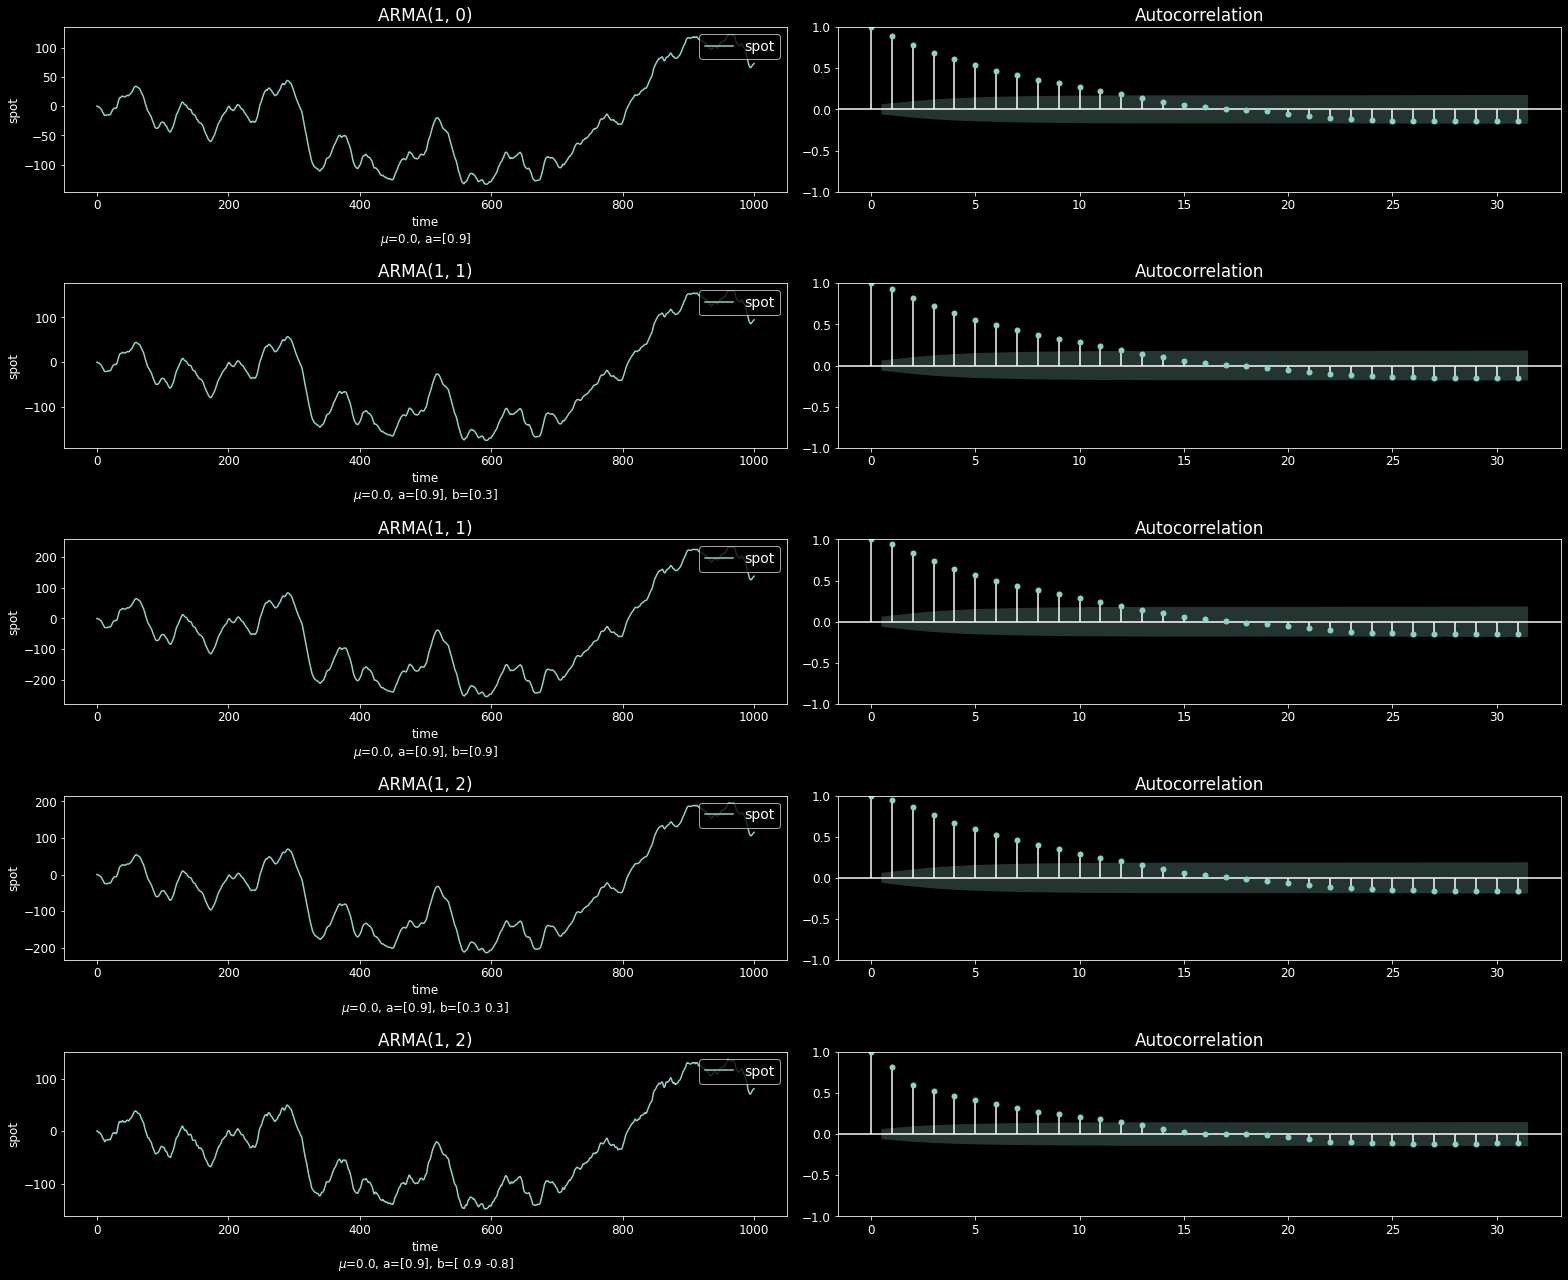

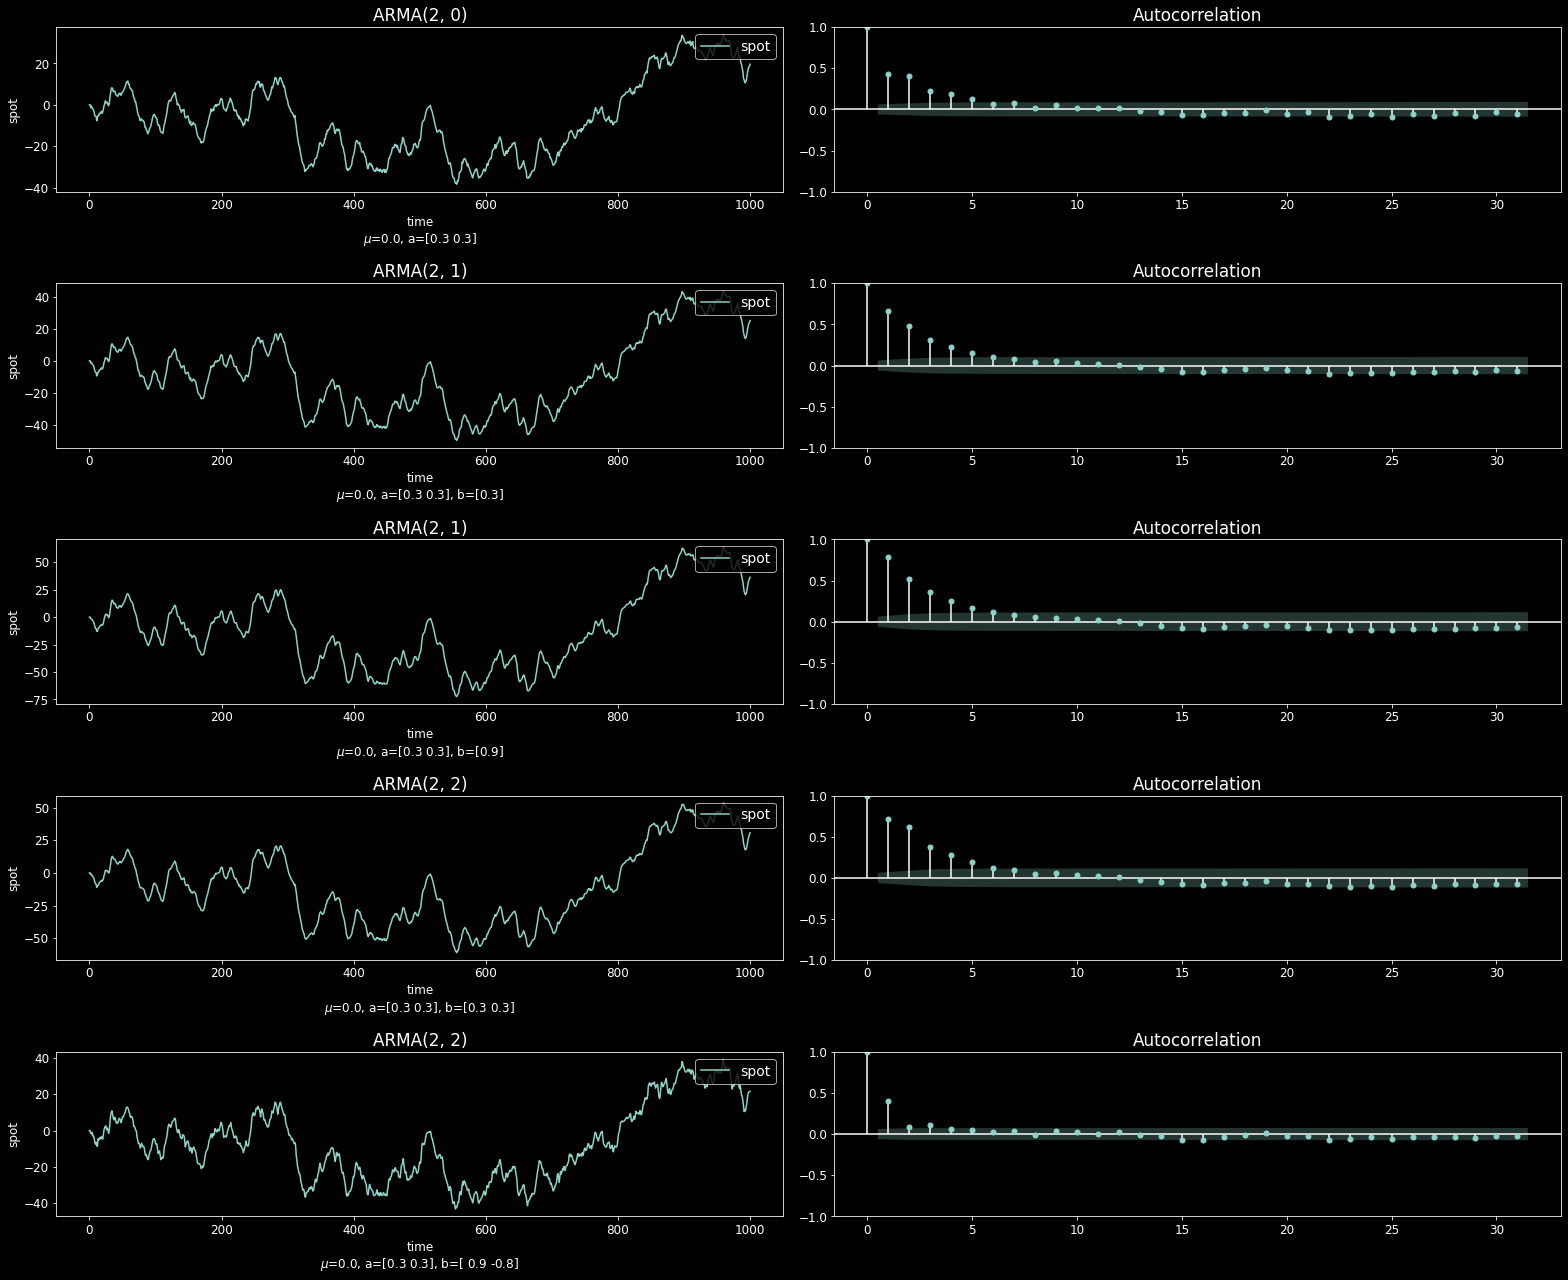

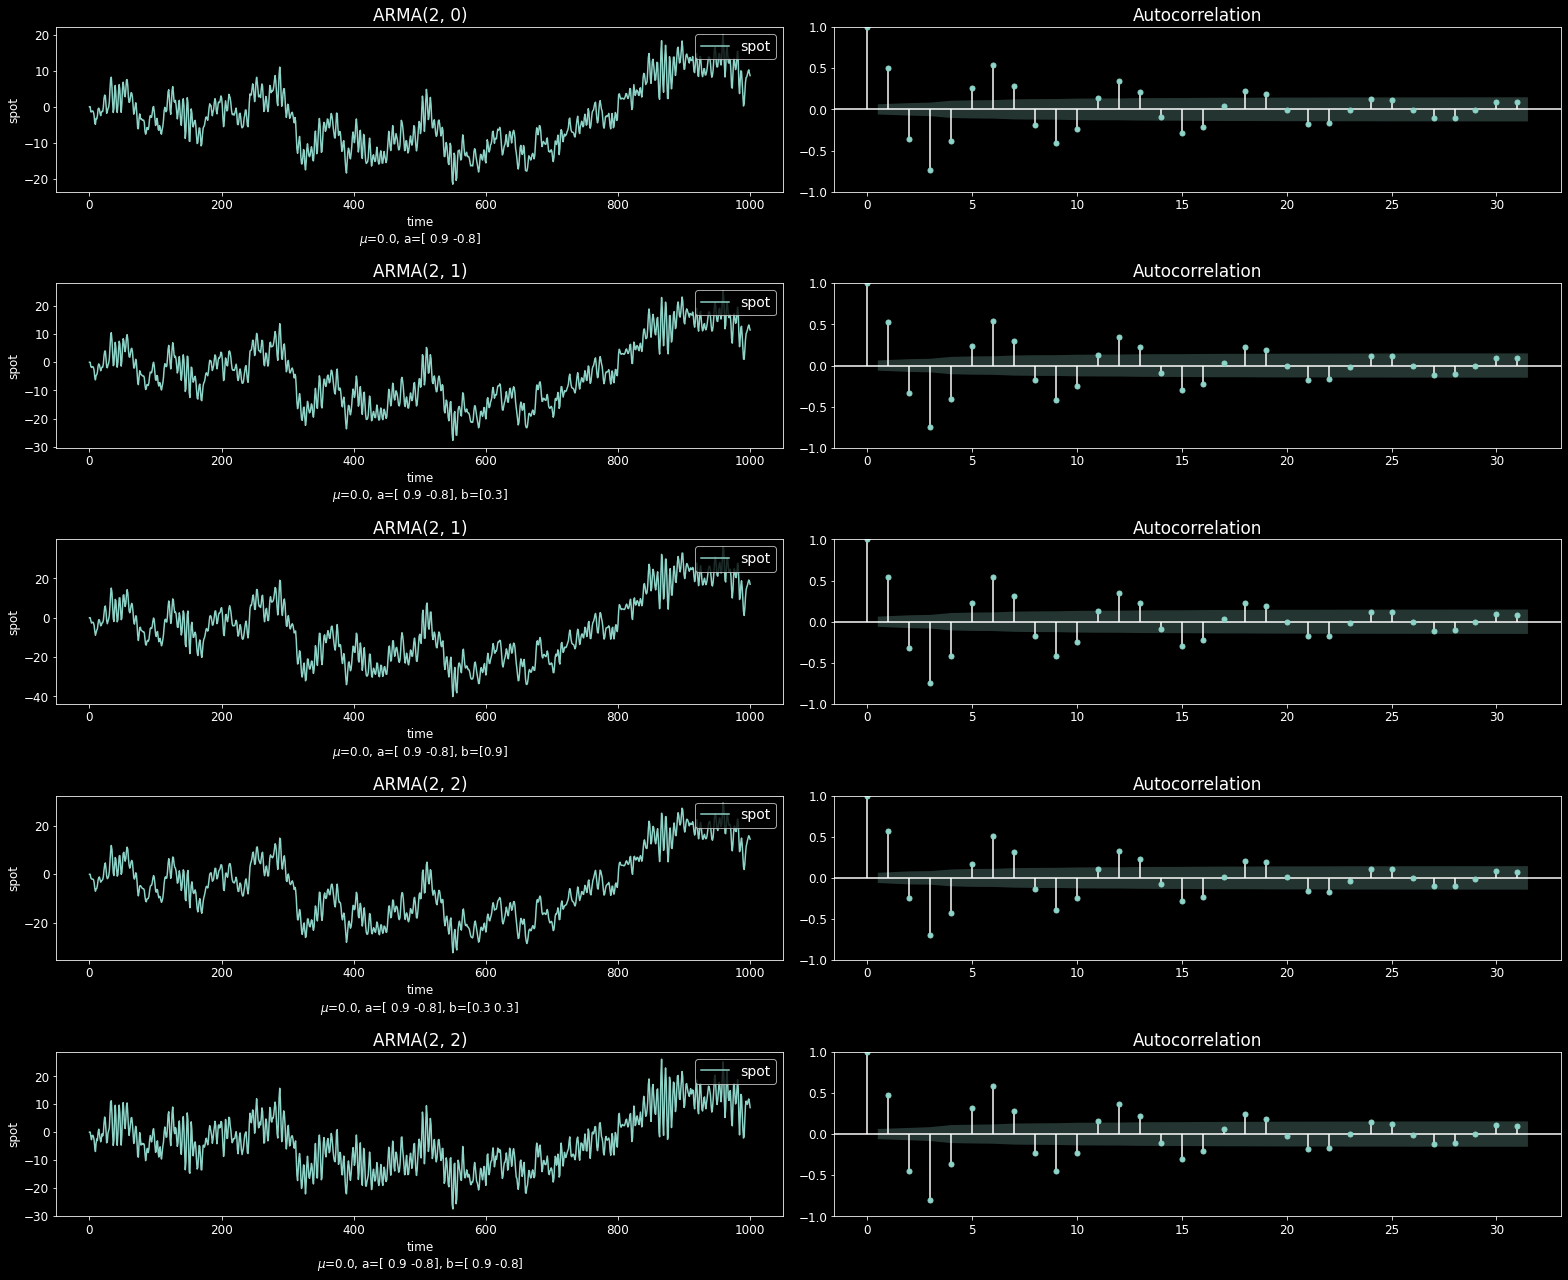

In [7]:
X = ARMA(x0=[0.0, 0.0], mu=0.0, T=T, vol=1.0)

for i in range(5):
    fig, axess = plt.subplots(nrows=5, ncols=2)
    for j in range(5):
        axes = axess[j]
        a = a_[i]
        b = b_[j]
        X.a = a
        X.b = b
        X.rng = np.random.default_rng(SEED)
        df = X.simulate()

        ax = axes[0]    
        if integrated:
            df.cumsum().plot(kind='line', ax=ax)
        else:
            df.plot(kind='line', ax=ax)

        if X.p > 0 and X.q > 0:
            ax.set_xlabel('time\n$\mu$={:.1f}, a={}, b={}'.format(X.mu, X.a, X.b))
        elif X.p > 0 and X.q == 0:
            ax.set_xlabel('time\n$\mu$={:.1f}, a={}'.format(X.mu, X.a))
        elif X.p == 0 and X.q > 0:
            ax.set_xlabel('time\n$\mu$={:.1f}, b={}'.format(X.mu, X.b))
        else:
            ax.set_xlabel('time\n$\mu$={:.1f}'.format(X.mu))

        ax.set_ylabel('spot')
        ax.legend(loc='upper right')
        ax.set_title('ARMA({:.0f}, {:.0f})'.format(X.p, X.q))

        ax = axes[1]
        plot_acf(df, ax=ax)

    plt.tight_layout()
    plt.show()

## ARCH(p)
\begin{align}
&X_t = \sigma_t Z_t\,,\\
&\sigma^2_t = v + \sum_{i=1}^p a_i X^2_{t-i}\,.
\end{align}

In [8]:
df

,spot
0.0,0.000000
1.0,0.000000
2.0,-1.423825
3.0,-1.299157
4.0,1.375573
...,...
996.0,-0.169433
997.0,1.371960
998.0,0.532735
999.0,-1.293878


/home/sauxpa/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
/home/sauxpa/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


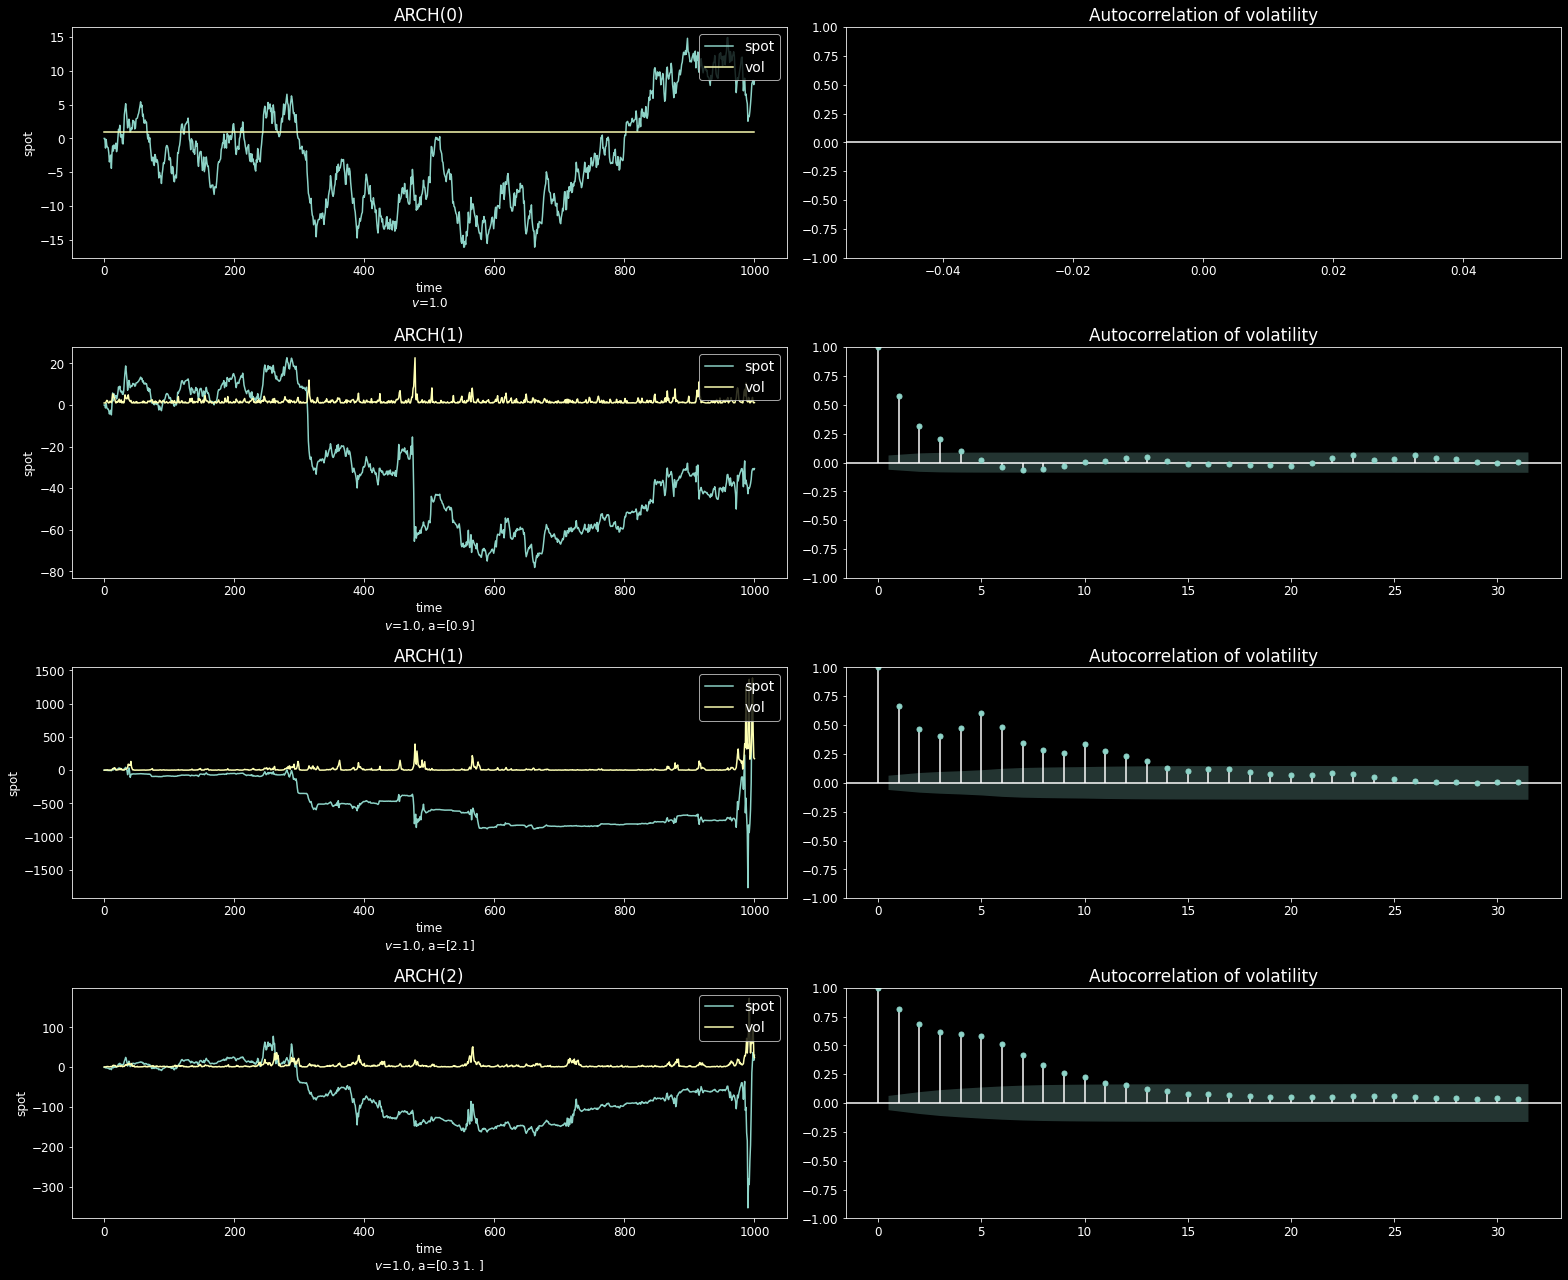

In [9]:
fig, axess = plt.subplots(nrows=4, ncols=2)

a_ = [
    [],
    [0.9],
    [2.1],
    [0.3, 1.0],
]

X = ARCH(x0=[0.0, 0.0], sigma0=[1.0, 1.0], v=1.0, T=T, vol=1.0)

for i, axes in enumerate(axess):
    a = a_[i]
    X.a = a
    X.rng = np.random.default_rng(SEED)
    df = X.simulate()
    
    ax = axes[0]
    if integrated:
        df['spot'].cumsum().plot(kind='line', ax=ax)
        df['vol'].plot(kind='line', ax=ax)
    else:
        df.plot(kind='line', ax=ax)

    
    if X.p > 0:
        ax.set_xlabel('time\n$v$={:.1f}, a={}'.format(X.v, X.a))
    else:
        ax.set_xlabel('time\n$v$={:.1f}'.format(X.v))
    ax.set_ylabel('spot')
    ax.legend(loc='upper right')
    ax.set_title('ARCH({:.0f})'.format(X.p))
    
    ax = axes[1]
    plot_acf(df['vol'], ax=ax, title='Autocorrelation of volatility')
    
plt.tight_layout()
plt.show()